In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

trav = pd.read_excel(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Travel\Travel_map.xlsx")

trav

,Region,Countries,Capital_city,Latitude,Longitude,Diversity,Safety,Hospitality,History,Nature,Return
0,Caucasia,Azerbaijan,Baku,40.4093,49.8671,Low,3,2,2,4,Yes
1,Central Europe,Hungary,Budapest,47.4979,19.0402,Low,4,2,3,4,Yes
2,Central Europe,Czech Republic,Prague,50.0755,14.4378,Low,3,1,3,3,No
3,Central Europe,Switzerland,Bern,46.9479,7.4474,Low,4,3,2,5,Yes
4,Middle East,Iran,Tehran,35.6892,51.3890,Low,4,5,3,5,Yes
5,Middle East,United Arab Emirates,Dubai,24.4539,54.3773,Medium,4,2,1,1,No
6,Middle East,Turkey,Istabul,41.0082,28.9784,Low,4,5,3,3,Yes
7,Oceania,Australia,Melbourne,-37.8136,144.9631,High,4,3,2,5,Yes
8,South Asia,India,Kerala,8.5241,76.9366,Low,2,5,2,3,Undecided
9,Southeast Asia,Singapore,Singapore,1.3521,103.8198,Medium,5,2,1,3,Undecided


In [23]:
trav.columns

Index(['Region', 'Countries', 'Capital_city', 'Latitude', 'Longitude',
       'Diversity', 'Safety', 'Hospitality', 'History', 'Nature', 'Return'],
      dtype='object')

In [24]:
#select the relevant columns to create map - country & coordinates

trav2 = trav[['Countries', 'Latitude', 'Longitude']]
trav2

,Countries,Latitude,Longitude
0,Azerbaijan,40.4093,49.8671
1,Hungary,47.4979,19.0402
2,Czech Republic,50.0755,14.4378
3,Switzerland,46.9479,7.4474
4,Iran,35.6892,51.3890
5,United Arab Emirates,24.4539,54.3773
6,Turkey,41.0082,28.9784
7,Australia,-37.8136,144.9631
8,India,8.5241,76.9366
9,Singapore,1.3521,103.8198


In [25]:
import folium
print(folium.__version__)

0.17.0


# Create map using Folium

**Tile layers/ Map textures**

1) Open street Map - standard

2) Stamen Toner
    - Black and white map style
    - detailed information + clear contrast

3) Stamen Terrain
    - Styled with terrain features
    - it provides good visual for geographical feature

4) Stamen watercolour - artistic look

5)  CartoDB positron - clean and bright map

6) CartoDB Dark Matter - dark-themed map that highlight colored data point

7) Mapbox Bright - bright and vibrant map

8) Mapbox dark - contrastive visual

9) OpentopoMap - emphasizes elevation and terrain


**Basic map**


In [26]:
# #calculate for central location using mean()
# central_lat = trav2['Latitude'].mean()
# central_long = trav2['Longitude'].mean()
# central_location = [central_lat, central_long]

# #create a folium map
# m = folium.Map(location=central_location, zoom_start=2.5)

# cretae folium map with a default location
m = folium.Map(location=[0,0], zoom_start=2)

#add marker for each station
for idx, row in trav2.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Countries'],
        # tooltip='Click me!'
        icon=folium.Icon(icon='info-sign', color='blue')
    ).add_to(m)

#Add tile layers
folium.TileLayer('cartodb positron').add_to(m)

# Find min and max latitude and longitude
min_lat = trav2['Latitude'].min()
max_lat = trav2['Latitude'].max()
min_long = trav2['Longitude'].min()
max_long = trav2['Longitude'].max()

# Adjust the map bounds
bounds = [[min_lat, min_long], [max_lat, max_long]]
m.fit_bounds(bounds)

m

# Folium Map Visualization

- comapred to the previous map example, this map will show more than coordinates. 
- It will show the ratings in regards to diversity, safety perception, hospitality, historical aspect and if I will return

In [27]:
# cretae folium map with default location
m2 = folium.Map(location=[0,0], zoom_start=3)

# add marker for each country
for idx, row in trav.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(
            f"Country: {row['Countries']}<br>"
            f"Capital: {row['Capital_city']}<br>"
            f"Diversity: {row['Diversity']}<br>"
            f"Safety: {row['Safety']}<br>"
            f"Hospitality: {row['Hospitality']}<br>"
            f"History: {row['History']}<br>"
            f"Will I return?: {row['Return']}<br>"
        ),
        icon=folium.Icon(icon='info-sign', color='blue')
    ).add_to(m2)

#add tile layers
folium.TileLayer('cartodb positron').add_to(m2)

#find min and max lat and long
min_lat = trav['Latitude'].min()
max_lat = trav['Latitude'].max()
min_long = trav['Longitude'].min()
max_long = trav['Longitude'].max()

#adjust the map bounds
bounds = [[min_lat, min_long], [max_lat, max_long]]
m2.fit_bounds(bounds)

m2



# Plotly


In [64]:
#THIS MAP IS SO UGLY!!!

# import plotly.express as px 
# import pandas as pd

# #cretae a scatter mapbox plot
# fig = px.scatter_geo(trav, lat='Latitude', lon='Longitude', text='Countries',title='Geographic Data Visualization')

# fig.update_layout(mapbox_style="open-street-map", 
# width=700,
# height=700)

# fig.show()

# Geopandas

- install geopandas
- Activate environment: conda active base
- install geopandas: conda install -c conda-forge geopandas
- reload window

C:\Users\ASYIKIN\AppData\Local\Temp\ipykernel_19000\1448688262.py:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



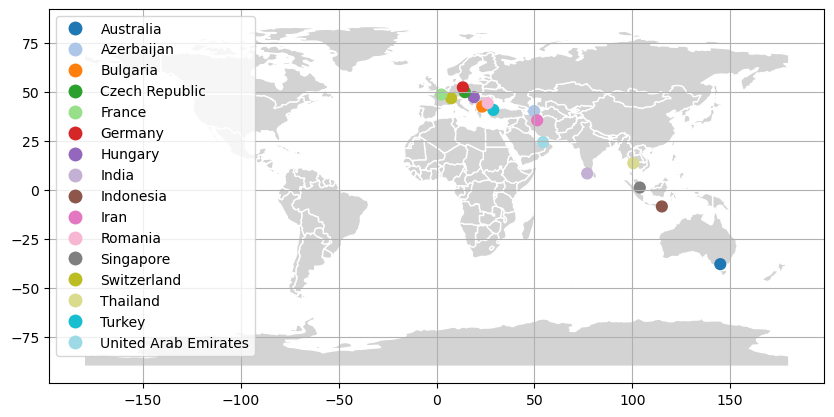

In [85]:
import geopandas as gpd

#convert to geodataframe
gdf = gpd.GeoDataFrame(trav, geometry=gpd.points_from_xy(trav.Longitude, trav.Latitude))

#plot world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10,8), facecolor='lightgray', edgecolor='White')

#plot points with customizations
gdf.plot(ax=ax, column='Countries', cmap='tab20', legend=True, markersize=60)

#add gridlines
ax.grid(True)

plt.show()

In [47]:
print(trav2.columns)
print(trav.columns)

Index(['Countries', 'Latitude', 'Longitude'], dtype='object')
Index(['Region', 'Countries', 'Capital_city', 'Latitude', 'Longitude',
       'Diversity', 'Safety', 'Hospitality', 'History', 'Nature', 'Return'],
      dtype='object')


In [63]:
import plotly.express as px
import pandas as pd

#calculate bounds
min_lat = trav['Latitude'].min()
max_lat = trav['Latitude'].max()
min_long = trav['Longitude'].min()
max_long = trav['Longitude'].max()

#calculate the center of the map
center_lat = (min_lat + max_lat)/2
center_lon = (min_long + max_long)/2

fig = px.scatter_mapbox(trav,
lon='Longitude',
lat='Latitude', 
zoom=1,
color='Countries',
height=400,
title="Countries I've visited",
hover_data=['Diversity','Safety', 'Hospitality', 'History', 'Return']
)

#update marker size
fig.update_traces(marker=dict(size=15))
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})


#fit the map to the data points
fig.update_layout(mapbox_center={"lat": center_lat, "lon": center_lon})

fig.show()